## Data wrangling

### Gatheing Data

In [167]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.pyplot import xticks

%matplotlib inline

In [168]:
df = pd.read_csv("prosperLoanData.csv")
df.head(2)

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0         0.158        0.138  ...         -133.18                0.0   
1         0.092        0.082  ...            0.00                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   

  InvestmentFromFriendsAmount Investors  
0                         0.0       258  
1                         0.0         1  

[2 rows x 81 columns]

In [166]:
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [169]:
# Since there are lot of columns in our dataset, i will select only those dataset that is needed to answer my questions
cols = ['Term' , 
        'LoanStatus', 
        'EstimatedEffectiveYield' ,  
        'BorrowerAPR' , 
        'BorrowerRate' , 
        'ProsperRating (numeric)',
        'ProsperRating (Alpha)',
        'ProsperScore',                     
        'ListingCategory (numeric)', 
        'EmploymentStatus',
        'Occupation', 
        'EmploymentStatusDuration', 
        'IsBorrowerHomeowner', 
        'IncomeVerifiable', 
        'StatedMonthlyIncome', 
        'MonthlyLoanPayment',
        'Recommendations', 
        'DebtToIncomeRatio',
        'LoanOriginalAmount' ,
        'PercentFunded',
        'IncomeRange',
        'Investors',
        'BorrowerState']


In [170]:
loan_df = df[cols]
loan_df.head(2)

Term LoanStatus  EstimatedEffectiveYield  BorrowerAPR  BorrowerRate  \
0    36  Completed                      NaN      0.16516         0.158   
1    36    Current                   0.0796      0.12016         0.092   

   ProsperRating (numeric) ProsperRating (Alpha)  ProsperScore  \
0                      NaN                   NaN           NaN   
1                      6.0                     A           7.0   

   ListingCategory (numeric) EmploymentStatus  ... IncomeVerifiable  \
0                          0    Self-employed  ...             True   
1                          2         Employed  ...             True   

   StatedMonthlyIncome  MonthlyLoanPayment  Recommendations  \
0          3083.333333              330.43                0   
1          6125.000000              318.93                0   

   DebtToIncomeRatio  LoanOriginalAmount  PercentFunded     IncomeRange  \
0               0.17                9425            1.0  $25,000-49,999   
1               0.18               10000            1.0  $50,000-74,999   

   Investors  BorrowerState  
0        258             CO  
1          1             CO  

[2 rows x 23 columns]

In [171]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Term                       113937 non-null  int64  
 1   LoanStatus                 113937 non-null  object 
 2   EstimatedEffectiveYield    84853 non-null   float64
 3   BorrowerAPR                113912 non-null  float64
 4   BorrowerRate               113937 non-null  float64
 5   ProsperRating (numeric)    84853 non-null   float64
 6   ProsperRating (Alpha)      84853 non-null   object 
 7   ProsperScore               84853 non-null   float64
 8   ListingCategory (numeric)  113937 non-null  int64  
 9   EmploymentStatus           111682 non-null  object 
 10  Occupation                 110349 non-null  object 
 11  EmploymentStatusDuration   106312 non-null  float64
 12  IsBorrowerHomeowner        113937 non-null  bool   
 13  IncomeVerifiable           11

In [173]:
# changing the some columns names
loan_df.rename(columns={'ProsperRating (Alpha)': 'ProsperRating_Alpha', 
                        'ProsperRating (numeric)': 'ProsperRating_Numeric',
                        'ListingCategory (numeric)' : 'ListingCategory_Numeric'
                       }, inplace=True)

In [174]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Term                      113937 non-null  int64  
 1   LoanStatus                113937 non-null  object 
 2   EstimatedEffectiveYield   84853 non-null   float64
 3   BorrowerAPR               113912 non-null  float64
 4   BorrowerRate              113937 non-null  float64
 5   ProsperRating_Numeric     84853 non-null   float64
 6   ProsperRating_Alpha       84853 non-null   object 
 7   ProsperScore              84853 non-null   float64
 8   ListingCategory_Numeric   113937 non-null  int64  
 9   EmploymentStatus          111682 non-null  object 
 10  Occupation                110349 non-null  object 
 11  EmploymentStatusDuration  106312 non-null  float64
 12  IsBorrowerHomeowner       113937 non-null  bool   
 13  IncomeVerifiable          113937 non-null  b

In [175]:
loan_df.isnull().sum()

Term                            0
LoanStatus                      0
EstimatedEffectiveYield     29084
BorrowerAPR                    25
BorrowerRate                    0
ProsperRating_Numeric       29084
ProsperRating_Alpha         29084
ProsperScore                29084
ListingCategory_Numeric         0
EmploymentStatus             2255
Occupation                   3588
EmploymentStatusDuration     7625
IsBorrowerHomeowner             0
IncomeVerifiable                0
StatedMonthlyIncome             0
MonthlyLoanPayment              0
Recommendations                 0
DebtToIncomeRatio            8554
LoanOriginalAmount              0
PercentFunded                   0
IncomeRange                     0
Investors                       0
BorrowerState                5515
dtype: int64

In [176]:
# As this project is more focused on visulization , for simplicity i am going to clean all null rows from the above data set 
loan_df = loan_df.dropna()

In [177]:
#checking for null values after cleaning
loan_df.isnull().sum()

Term                        0
LoanStatus                  0
EstimatedEffectiveYield     0
BorrowerAPR                 0
BorrowerRate                0
ProsperRating_Numeric       0
ProsperRating_Alpha         0
ProsperScore                0
ListingCategory_Numeric     0
EmploymentStatus            0
Occupation                  0
EmploymentStatusDuration    0
IsBorrowerHomeowner         0
IncomeVerifiable            0
StatedMonthlyIncome         0
MonthlyLoanPayment          0
Recommendations             0
DebtToIncomeRatio           0
LoanOriginalAmount          0
PercentFunded               0
IncomeRange                 0
Investors                   0
BorrowerState               0
dtype: int64

### Identifying categoralcal varibale that are in order data type  and changing to category data type if its not in cateory data type

In [178]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76216 entries, 1 to 113936
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Term                      76216 non-null  int64  
 1   LoanStatus                76216 non-null  object 
 2   EstimatedEffectiveYield   76216 non-null  float64
 3   BorrowerAPR               76216 non-null  float64
 4   BorrowerRate              76216 non-null  float64
 5   ProsperRating_Numeric     76216 non-null  float64
 6   ProsperRating_Alpha       76216 non-null  object 
 7   ProsperScore              76216 non-null  float64
 8   ListingCategory_Numeric   76216 non-null  int64  
 9   EmploymentStatus          76216 non-null  object 
 10  Occupation                76216 non-null  object 
 11  EmploymentStatusDuration  76216 non-null  float64
 12  IsBorrowerHomeowner       76216 non-null  bool   
 13  IncomeVerifiable          76216 non-null  bool   
 14  State

#### 1. Term

In [179]:
loan_df["Term"].value_counts()

36    51919
60    22883
12     1414
Name: Term, dtype: int64

In [180]:
# since the term column is cateogorical , converting its data type from int to category
loan_df['Term'] = loan_df['Term'].astype('category')

#### 2. EmploymentStatus

In [181]:
loan_df["EmploymentStatus"].value_counts()

Employed         65883
Full-time         7577
Other             2194
Retired            320
Part-time          199
Self-employed       42
Not employed         1
Name: EmploymentStatus, dtype: int64

In [182]:
loan_df['EmploymentStatus'] = loan_df['EmploymentStatus'].astype('category')

#### 3. LoanStatus

In [183]:
loan_df["LoanStatus"].value_counts()

Current                   51170
Completed                 17687
Chargedoff                 4444
Defaulted                   885
Past Due (1-15 days)        714
Past Due (31-60 days)       322
Past Due (91-120 days)      277
Past Due (61-90 days)       275
Past Due (16-30 days)       241
FinalPaymentInProgress      187
Past Due (>120 days)         14
Name: LoanStatus, dtype: int64

In [184]:
loan_df['LoanStatus'] = loan_df['LoanStatus'].astype('category')

#### 4. IncomeRange

In [185]:
loan_df["IncomeRange"].value_counts()

$50,000-74,999    23692
$25,000-49,999    21421
$100,000+         13977
$75,000-99,999    13547
$1-24,999          3578
Not employed          1
Name: IncomeRange, dtype: int64

In [186]:
loan_df['IncomeRange'] = loan_df['IncomeRange'].astype('category')

#### 5. ProsperRating_Alpha

In [187]:
loan_df["ProsperRating_Alpha"].value_counts()

C     16499
B     14379
A     13490
D     12629
E      8443
HR     5680
AA     5096
Name: ProsperRating_Alpha, dtype: int64

In [188]:
loan_df['ProsperRating_Alpha'] = loan_df['ProsperRating_Alpha'].astype('category')

#### 6. Occupation

In [189]:
loan_df["Occupation"].value_counts()

Other                          18501
Professional                    9916
Executive                       3206
Computer Programmer             3038
Teacher                         2777
                               ...  
Student - College Junior          19
Student - College Freshman        12
Student - College Sophomore        9
Student - Community College        5
Student - Technical School         1
Name: Occupation, Length: 67, dtype: int64

In [190]:
loan_df['Occupation'] = loan_df['Occupation'].astype('category')

#### 7. BorrowerState

In [191]:
loan_df["BorrowerState"].value_counts()

CA    9574
NY    5184
TX    5086
FL    4738
IL    3871
OH    3061
GA    3006
VA    2530
NJ    2463
PA    2416
MI    2349
NC    2194
MD    2066
WA    1925
MA    1696
MO    1590
MN    1554
CO    1539
IN    1518
TN    1396
CT    1371
WI    1359
AZ    1237
AL    1085
OR    1045
NV     916
SC     872
KY     804
KS     775
LA     768
AR     689
OK     665
MS     600
NE     496
UT     441
NH     410
RI     376
ID     348
DC     310
HI     307
NM     293
WV     274
DE     253
MT     192
SD     165
VT     151
AK     150
WY     108
Name: BorrowerState, dtype: int64

In [192]:
loan_df['BorrowerState'] = loan_df['BorrowerState'].astype('category')

In [193]:
#checking weather the data type is converted or not 
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76216 entries, 1 to 113936
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Term                      76216 non-null  category
 1   LoanStatus                76216 non-null  category
 2   EstimatedEffectiveYield   76216 non-null  float64 
 3   BorrowerAPR               76216 non-null  float64 
 4   BorrowerRate              76216 non-null  float64 
 5   ProsperRating_Numeric     76216 non-null  float64 
 6   ProsperRating_Alpha       76216 non-null  category
 7   ProsperScore              76216 non-null  float64 
 8   ListingCategory_Numeric   76216 non-null  int64   
 9   EmploymentStatus          76216 non-null  category
 10  Occupation                76216 non-null  category
 11  EmploymentStatusDuration  76216 non-null  float64 
 12  IsBorrowerHomeowner       76216 non-null  bool    
 13  IncomeVerifiable          76216 non-null  boo

In [194]:
loan_df.head()

Term LoanStatus  EstimatedEffectiveYield  BorrowerAPR  BorrowerRate  \
1   36    Current                  0.07960      0.12016        0.0920   
3   36    Current                  0.08490      0.12528        0.0974   
4   36    Current                  0.18316      0.24614        0.2085   
5   60    Current                  0.11567      0.15425        0.1314   
6   36    Current                  0.23820      0.31032        0.2712   

   ProsperRating_Numeric ProsperRating_Alpha  ProsperScore  \
1                    6.0                   A           7.0   
3                    6.0                   A           9.0   
4                    3.0                   D           4.0   
5                    5.0                   B          10.0   
6                    2.0                   E           2.0   

   ListingCategory_Numeric EmploymentStatus  ... IncomeVerifiable  \
1                        2         Employed  ...             True   
3                       16         Employed  ...             True   
4                        2         Employed  ...             True   
5                        1         Employed  ...             True   
6                        1         Employed  ...             True   

   StatedMonthlyIncome  MonthlyLoanPayment  Recommendations  \
1          6125.000000              318.93                0   
3          2875.000000              321.45                0   
4          9583.333333              563.97                0   
5          8333.333333              342.37                0   
6          2083.333333              122.67                0   

   DebtToIncomeRatio  LoanOriginalAmount  PercentFunded     IncomeRange  \
1               0.18               10000            1.0  $50,000-74,999   
3               0.15               10000            1.0  $25,000-49,999   
4               0.26               15000            1.0       $100,000+   
5               0.36               15000            1.0       $100,000+   
6               0.27                3000            1.0  $25,000-49,999   

   Investors  BorrowerState  
1          1             CO  
3        158             GA  
4         20             MN  
5          1             NM  
6          1             KS  

[5 rows x 23 columns]

### And this is final cleaned dataset for our project

## Visulization

### Univariate Exploration of Data

#### Analyzing categorical variable

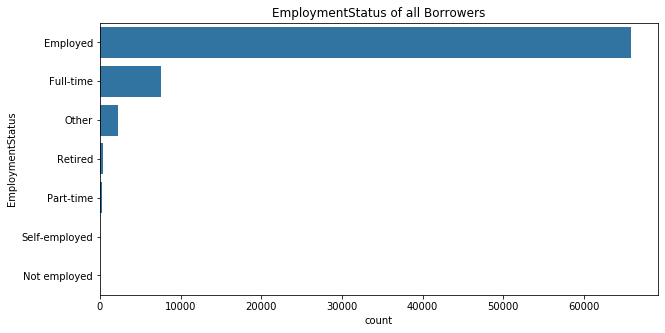

In [195]:
# 'EmploymentStatus'
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
plt.title("EmploymentStatus of all Borrowers")
sb.countplot(data = loan_df, y = 'EmploymentStatus', color = base_color,
             order = loan_df['EmploymentStatus'].value_counts().index);

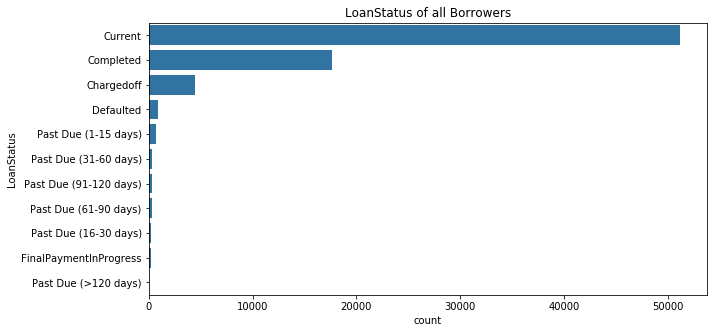

In [196]:
#'LoanStatus'
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
plt.title("LoanStatus of all Borrowers")
sb.countplot(data = loan_df, y = 'LoanStatus', color = base_color,
             order = loan_df['LoanStatus'].value_counts().index);

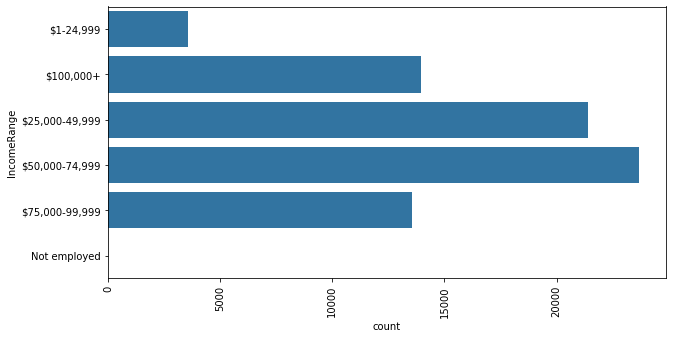

In [197]:
#IncomeRange
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
sb.countplot(data= loan_df, y= "IncomeRange", color= base_color )
plt.xticks(rotation = 90);

0.8644247926944474


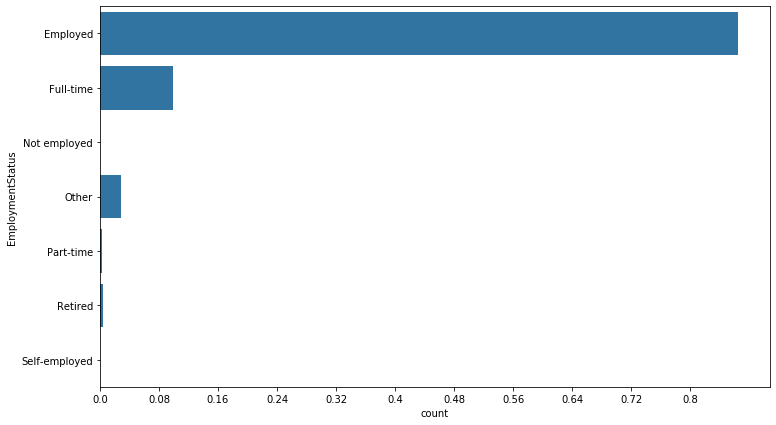

In [198]:
#Relative Frequency for the employment status of all the borrower
plt.figure(figsize = [12, 7]) 
n_count = loan_df.shape[0]
max_count = loan_df["EmploymentStatus"].value_counts().max()
max_prop = max_count/n_count
print(max_prop)

location = np.arange(0, max_prop, .08)
tick_name = ['{}'.format(v) for v in location ]

base_color = sb.color_palette()[0]
sb.countplot(data= loan_df, y="EmploymentStatus", color = base_color)
#plt.xticks(rotation = 90)
plt.xticks(location*n_count, tick_name);

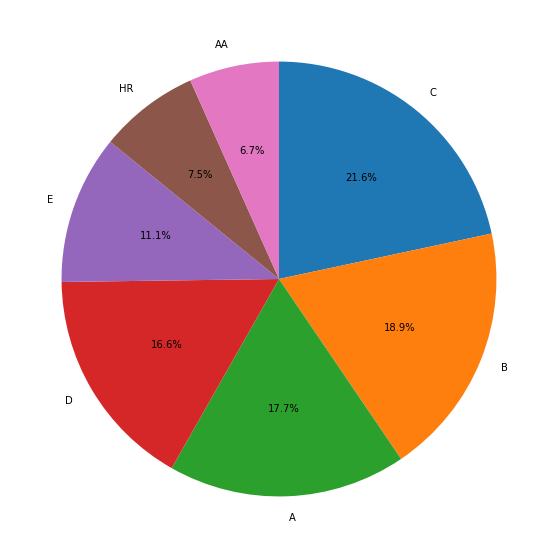

In [199]:
#ProsperRating_Alpha
plt.figure(figsize = [15, 10])
sorted_counts = loan_df['ProsperRating_Alpha'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, autopct   = '%.1f%%');

The  Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA.  Applicable for loans originated after July 2009.

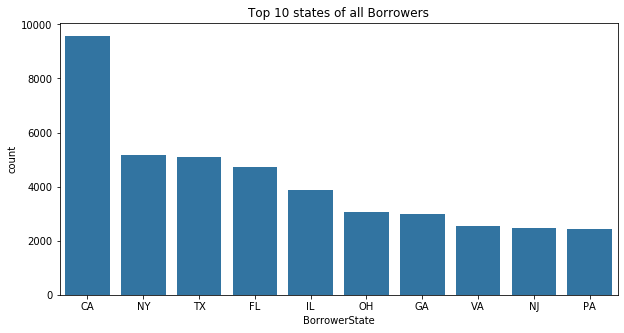

In [200]:
# BorrowerState
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
sb.countplot(data = loan_df, x = 'BorrowerState', color = base_color,
             order = loan_df['BorrowerState'].value_counts().head(10).index );
plt.title("Top 10 states of all Borrowers");

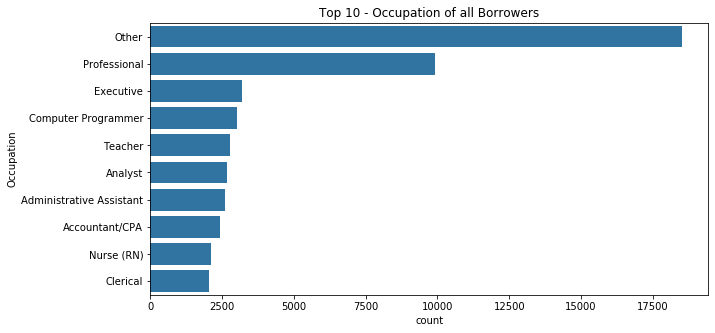

In [201]:
#'Occupation'
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
sb.countplot(data = loan_df, y = 'Occupation', color = base_color,
             order = loan_df['Occupation'].value_counts().head(10).index );
plt.title("Top 10 - Occupation of all Borrowers");

#### Insights with categorical variables analysis


- Majority of all Borrowers had loanStatus with current and completed state

- Almost 90% of borrower were employed 

- Loans with "AA" category are with lesser count

- Top IncomeRange of all Borrowers are within $50,000-74,999

- The state with highest Borrowers are from CA 

- Majority of the borrowers are with an occupation of Professional where Computer Programming and Executive remains in second and third position



#### Analyzing Numeric varibale

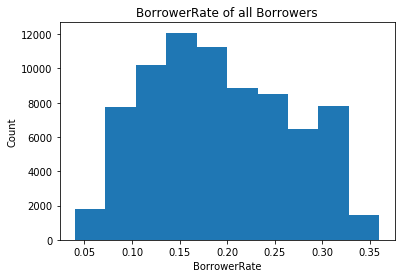

In [202]:
plt.hist(data = loan_df, x = 'BorrowerRate');
plt.xlabel('BorrowerRate');
plt.ylabel('Count');
plt.title("BorrowerRate of all Borrowers");

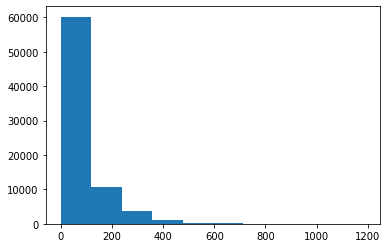

In [203]:
plt.hist(data = loan_df, x = 'Investors');

In [204]:
np.log10(loan_df['Investors'].describe())

count    4.882046
mean     1.845089
std      1.990345
min      0.000000
25%      0.000000
50%      1.505150
75%      2.000000
max      3.075182
Name: Investors, dtype: float64

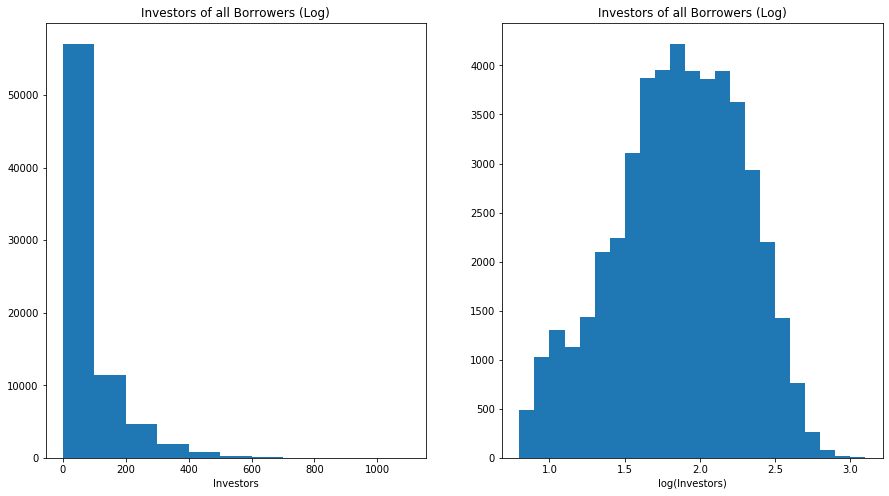

In [205]:
plt.figure(figsize = [15, 8])

# left histogram: data plotted in natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, loan_df['Investors'].max()+10, 100)
plt.hist(data =loan_df, x = 'Investors', bins = bin_edges)
plt.xlabel('Investors')
plt.title("Investors of all Borrowers (Log)");

# right histogram: data plotted after direct log transformation
plt.subplot(1, 2, 2)
log_data = np.log10(loan_df['Investors']) # direct data transform
log_bin_edges = np.arange(0.8, log_data.max()+0.1, 0.1)
plt.hist(log_data, bins = log_bin_edges)
plt.xlabel('log(Investors)')
plt.title("Investors of all Borrowers (Log)");

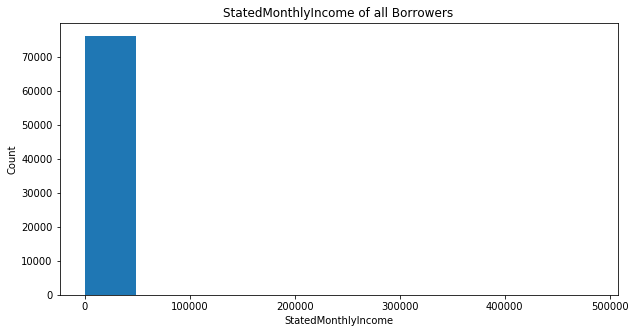

In [206]:
plt.figure(figsize = [10, 5]) 
plt.hist(data = loan_df, x = 'StatedMonthlyIncome');
plt.xlabel('StatedMonthlyIncome');
plt.ylabel('Count');
plt.title("StatedMonthlyIncome of all Borrowers");

In [207]:
(loan_df['StatedMonthlyIncome'].describe())

count     76216.000000
mean       6002.833586
std        5110.743506
min           0.250000
25%        3583.333333
50%        5041.666667
75%        7250.000000
max      483333.333333
Name: StatedMonthlyIncome, dtype: float64

In [208]:
np.log10(loan_df['StatedMonthlyIncome'].describe())

count    4.882046
mean     3.778356
std      3.708484
min     -0.602060
25%      3.554287
50%      3.702574
75%      3.860338
max      5.684247
Name: StatedMonthlyIncome, dtype: float64

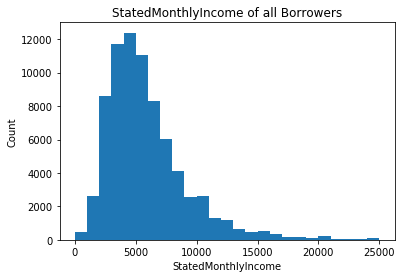

In [209]:
loan_df_sub = loan_df[loan_df['StatedMonthlyIncome'] <= 25000]
bin_edges = np.arange(0, loan_df_sub['StatedMonthlyIncome'].max()+1000, 1000)
plt.hist(data = loan_df, x = 'StatedMonthlyIncome', bins = bin_edges);
plt.xlabel('StatedMonthlyIncome');
plt.ylabel('Count');
plt.title("StatedMonthlyIncome of all Borrowers");

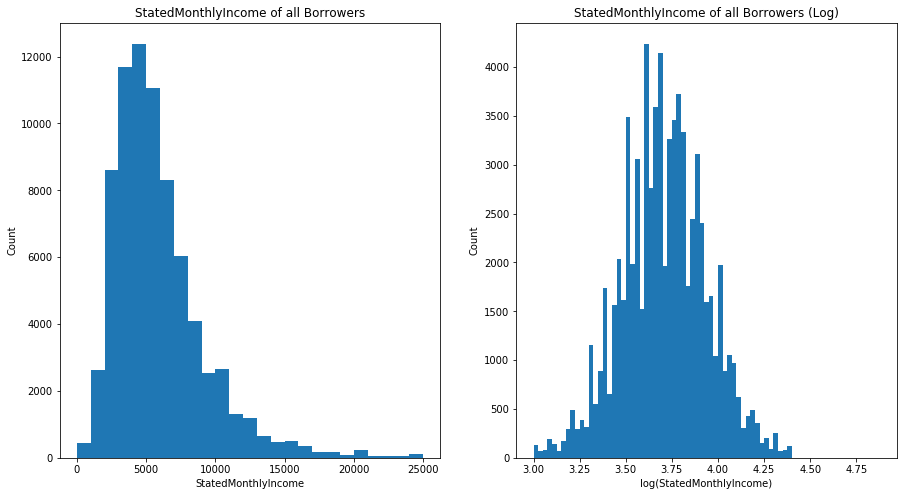

In [210]:
plt.figure(figsize = [15, 8])

# left histogram: data plotted in natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, loan_df_sub['StatedMonthlyIncome'].max()+1000, 1000)
plt.hist(data =loan_df, x = 'StatedMonthlyIncome', bins = bin_edges)
plt.xlabel('StatedMonthlyIncome')
plt.ylabel('Count');
plt.title("StatedMonthlyIncome of all Borrowers");

# right histogram: data plotted after direct log transformation
plt.subplot(1, 2, 2)
log_data = np.log10(loan_df_sub['StatedMonthlyIncome']) # direct data transform
log_bin_edges = np.arange(3, log_data.max()+0.5, 0.025)
plt.hist(log_data, bins = log_bin_edges)
plt.xlabel('log(StatedMonthlyIncome)');
plt.ylabel('Count');
plt.title("StatedMonthlyIncome of all Borrowers (Log)");



 #Without log transformation looks good on StatedMonthlyIncome

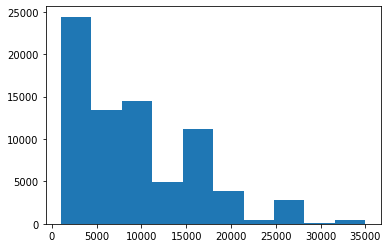

In [211]:
plt.hist(data = loan_df, x = 'LoanOriginalAmount');

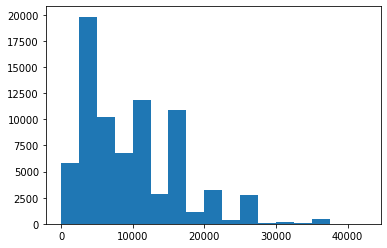

In [212]:
bins_edge = np.arange(0, loan_df["LoanOriginalAmount"].max()+10000,2500)
plt.hist(data = loan_df, x = "LoanOriginalAmount", bins=bins_edge);

In [213]:
(loan_df['LoanOriginalAmount'].describe())

count    76216.000000
mean      9294.999410
std       6413.404265
min       1000.000000
25%       4000.000000
50%       8000.000000
75%      14603.250000
max      35000.000000
Name: LoanOriginalAmount, dtype: float64

In [214]:
np.log10(loan_df['LoanOriginalAmount'].describe())

count    4.882046
mean     3.968249
std      3.807089
min      3.000000
25%      3.602060
50%      3.903090
75%      4.164450
max      4.544068
Name: LoanOriginalAmount, dtype: float64

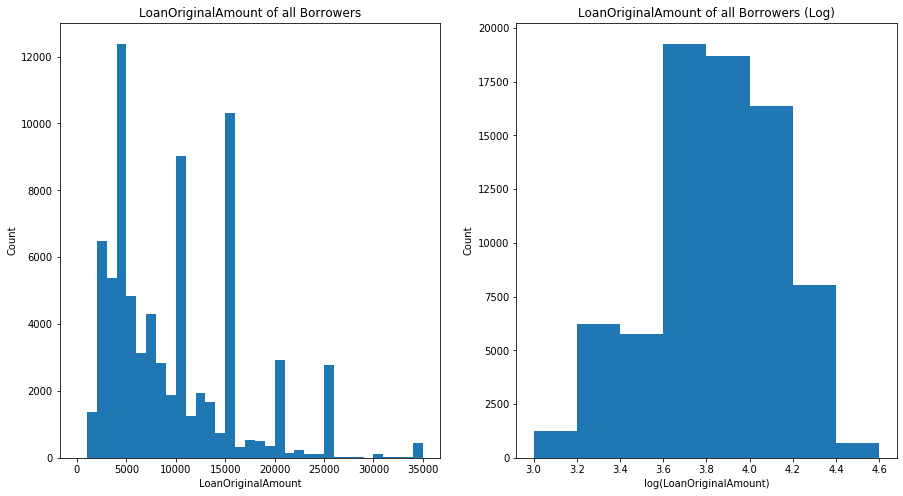

In [215]:
plt.figure(figsize = [15, 8])
# left histogram: data plotted in natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, loan_df['LoanOriginalAmount'].max()+1000, 1000)
plt.hist(data =loan_df, x = 'LoanOriginalAmount', bins = bin_edges)
plt.xlabel('LoanOriginalAmount')
plt.ylabel('Count');
plt.title("LoanOriginalAmount of all Borrowers");

# right histogram: data plotted after direct log transformation
plt.subplot(1, 2, 2)
log_data = np.log10(loan_df['LoanOriginalAmount']) # direct data transform
log_bin_edges = np.arange(3.0, log_data.max()+0.1, 0.2)
plt.hist(log_data, bins = log_bin_edges)
plt.xlabel('log(LoanOriginalAmount)');
plt.ylabel('Count');
plt.title("LoanOriginalAmount of all Borrowers (Log)");

#### Insights with Numerical variables analysis

- The Borrower's interest rate for this loan. The borrowers rate follow an approximately unimodal distribution, with the peak around 0.16. There seems to be a spike that occurs around 0.32.
- Majority of the investors are between 0 and 100
- The monthly income the borrower stated at the time the listing was created. Monthly Income will definitely be right skewed since very few people will be having a higher salary. So I cut the outliers and made the data to look at log 10 scales. Majority of the borrowers are having a salary with less than 10000 USD and the peak is observed at 5000 USD
- The origination amount of the loan.Now this is interesting. Here we see that the distribution is a right skewed with multiple peaks observed at 4000 USD, 10000 USD and 15000 USD.

## Bivariate Exploration

#### Relationship between two numeric variables

In [216]:
loan_df.dtypes

Term                        category
LoanStatus                  category
EstimatedEffectiveYield      float64
BorrowerAPR                  float64
BorrowerRate                 float64
ProsperRating_Numeric        float64
ProsperRating_Alpha         category
ProsperScore                 float64
ListingCategory_Numeric        int64
EmploymentStatus            category
Occupation                  category
EmploymentStatusDuration     float64
IsBorrowerHomeowner             bool
IncomeVerifiable                bool
StatedMonthlyIncome          float64
MonthlyLoanPayment           float64
Recommendations                int64
DebtToIncomeRatio            float64
LoanOriginalAmount             int64
PercentFunded                float64
IncomeRange                 category
Investors                      int64
BorrowerState               category
dtype: object

In [217]:
numeric_vars = ['EstimatedEffectiveYield', 'BorrowerAPR', 'BorrowerRate',
                'ProsperRating_Numeric', 'ProsperScore', 
                'ListingCategory_Numeric','EmploymentStatusDuration', 
                'StatedMonthlyIncome', 'MonthlyLoanPayment',
                'Recommendations', 'DebtToIncomeRatio', 'LoanOriginalAmount','PercentFunded', 'Investors']
numeric_vars_1 = ['BorrowerRate',
                 'ProsperScore',                 
                'StatedMonthlyIncome', 'MonthlyLoanPayment',
                'LoanOriginalAmount', 'Investors']
categoric_vars = ['LoanStatus', 'ProsperRating_Alpha', 'EmploymentStatus', 'Occupation',
       'IncomeRange', 'BorrowerState', 'Term', 'IsBorrowerHomeowner']

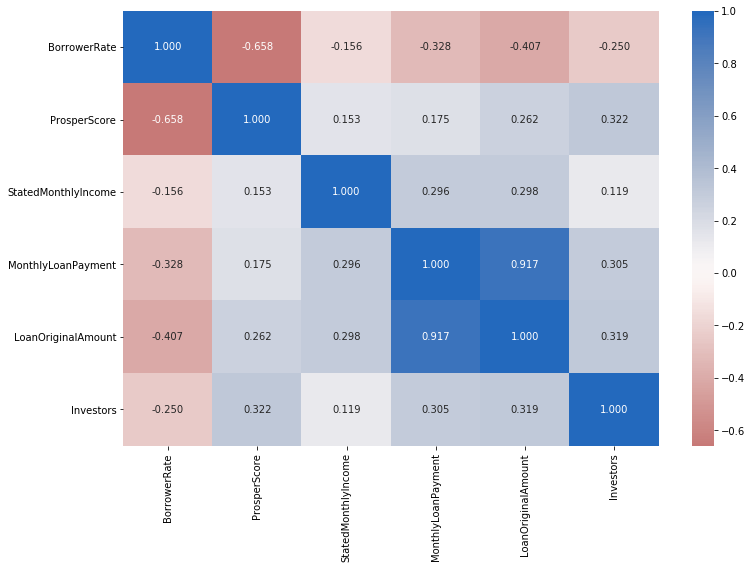

In [218]:
# correlation plot
plt.figure(figsize = [12, 8])
sb.heatmap(loan_df[numeric_vars_1].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

#### Relationship between numeric & categorical variables

Text(0.5, 1.0, 'Income Range vs Loan Amount')

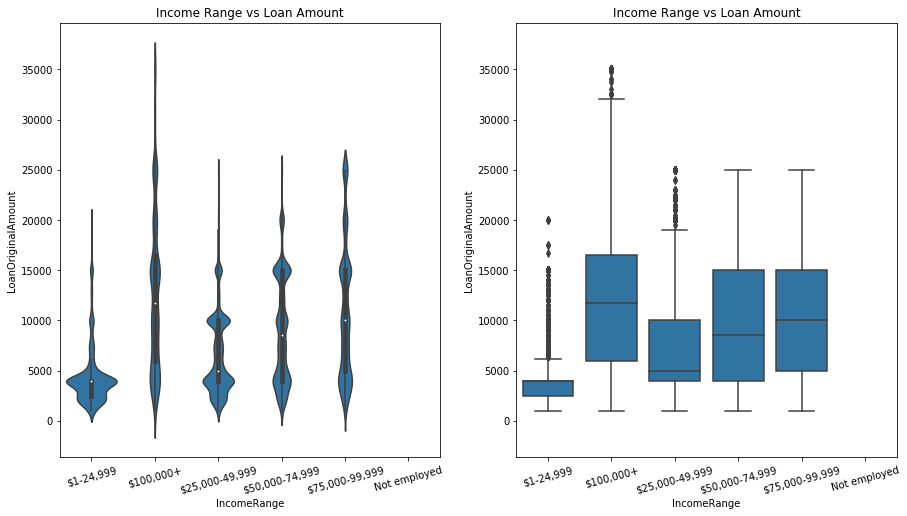

In [219]:
loan_df_sub = loan_df[(loan_df['StatedMonthlyIncome'] <= 10000) ]
loan_df_sub = loan_df_sub[loan_df_sub['IncomeRange'] != 'Not employed']


plt.figure(figsize = [15, 8])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = loan_df_sub, x = 'IncomeRange', y = 'LoanOriginalAmount', color = base_color)
plt.xticks(rotation = 15);
plt.title('Income Range vs Loan Amount')

# right plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = loan_df_sub, x = 'IncomeRange', y = 'LoanOriginalAmount', color = base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
plt.xticks(rotation = 15);
plt.title('Income Range vs Loan Amount')

#### Categorical variables analysis

Text(0.5, 1, 'Count of Applicants w.r.t LoanStatus and HomeownerStatus')

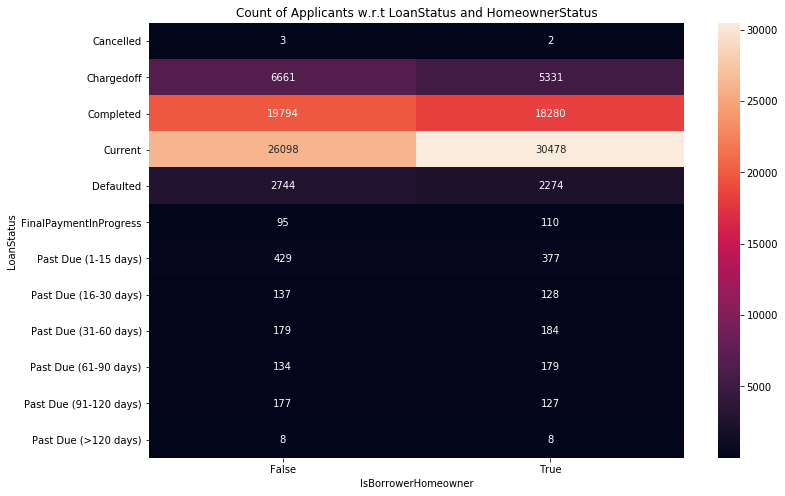

In [220]:
plt.figure(figsize = [12, 8])
ct_counts = df.groupby(['IsBorrowerHomeowner', 'LoanStatus']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'LoanStatus', columns = 'IsBorrowerHomeowner', values = 'count')
sb.heatmap(ct_counts, annot = True, fmt = 'd');
plt.title('Count of Applicants w.r.t LoanStatus and HomeownerStatus')

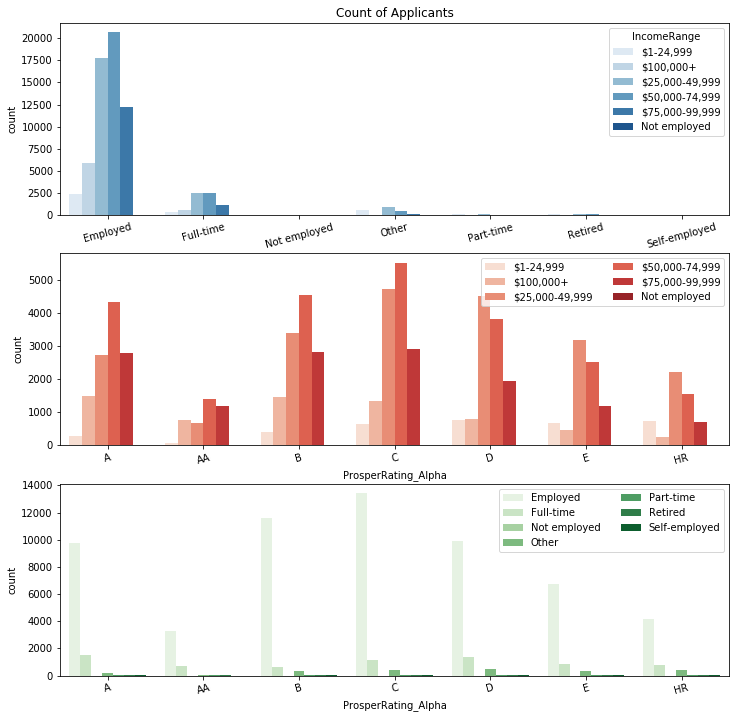

In [221]:
# since there's only three subplots to create, using the full data should be fine.
categoric_vars = ['EmploymentStatus', 'ProsperRating_Alpha', 'IncomeRange']

plt.figure(figsize = [12, 12])

# subplot 1: color vs cut
plt.subplot(3, 1, 1)
sb.countplot(data = loan_df_sub, x = 'EmploymentStatus', hue = 'IncomeRange', palette = 'Blues')
plt.xticks(rotation = 15)
plt.title('Count of Applicants')

# subplot 2: clarity vs. cut
ax = plt.subplot(3, 1, 2)
sb.countplot(data = loan_df_sub, x = 'ProsperRating_Alpha', hue = 'IncomeRange', palette = 'Reds')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping
plt.xticks(rotation = 15)


# subplot 3: clarity vs. color, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = loan_df_sub, x = 'ProsperRating_Alpha', hue = 'EmploymentStatus', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping
plt.xticks(rotation = 15)


plt.show()

#### Insights about the entire Bivariate analysis
- Loan original amount and monthly loan payment is highly correlated and it is expected and borrowers interest rate and proper score are highly correlated(-vely), Borrower interest rate and loanamount are -vely correlated.

- The range of the salaries stated is higher for employed borrowers.

- LoanOriginalAmount is highest for A and B Prosper ratings, when compared with income range - it is following a normal or expected trend that more salary borrowers are having higher loanoriginalamount

- LoanStatus with current and completed have own homes when they applied for loans

- Majority of the loan applicants are from 50K to 75K range with emloyeed status

- Majority of the borrowers with highest loan amount are taken by Employed, this is followed by others and fulltime employees




### Multivariate Exploration

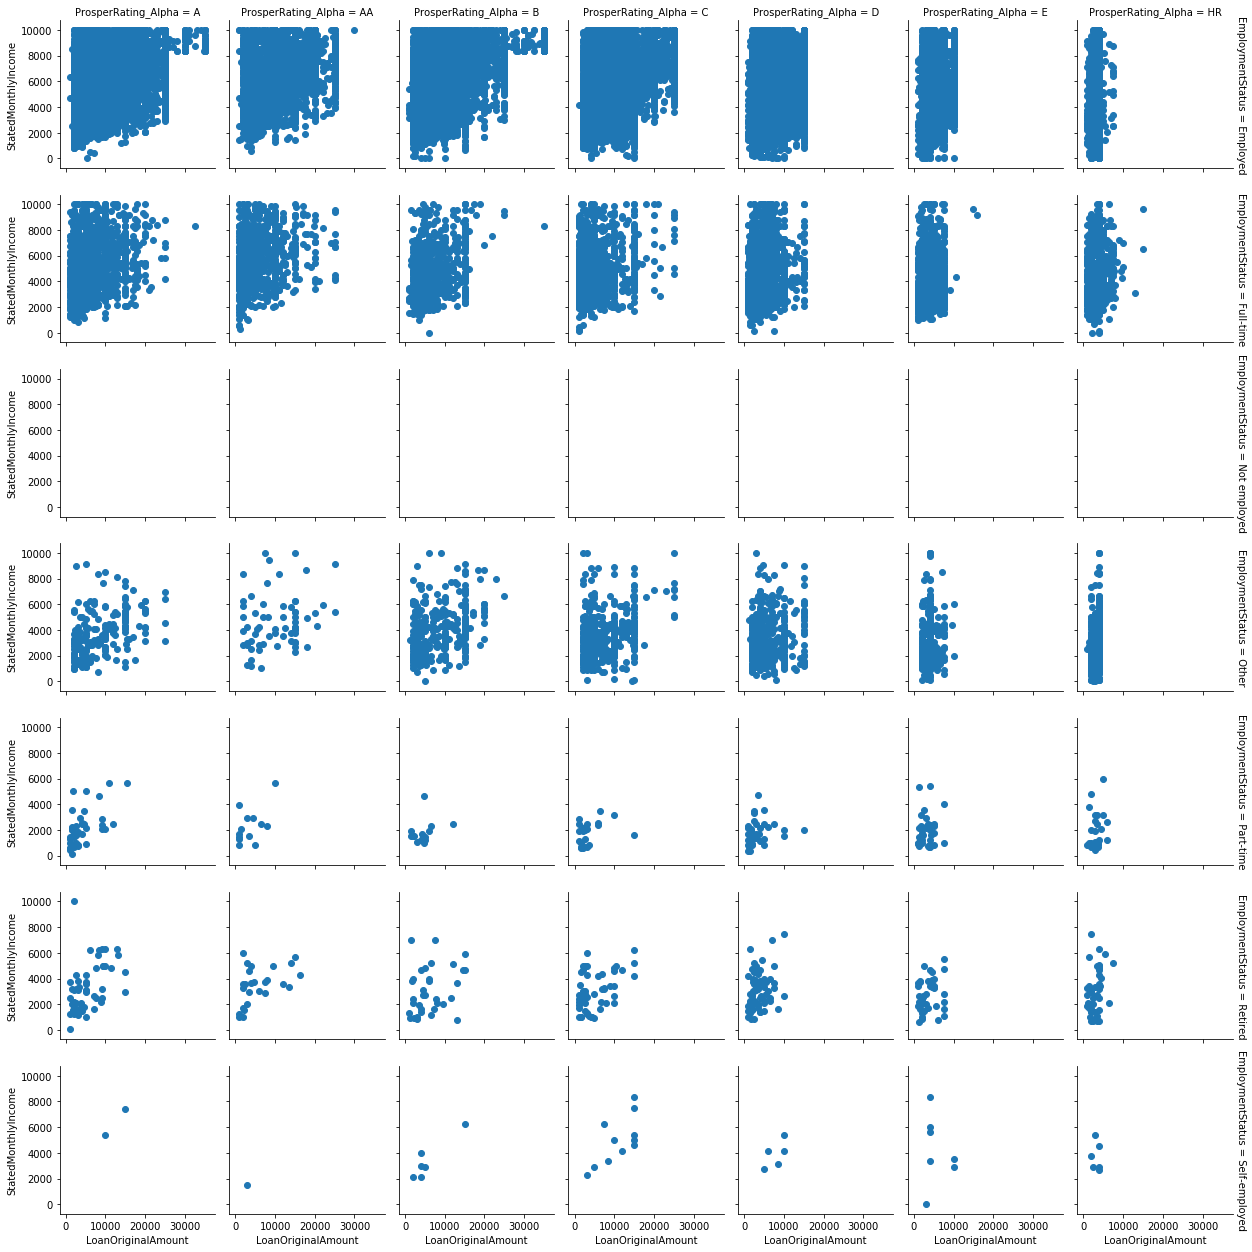

In [223]:
g = sb.FacetGrid(data = loan_df_sub, col = 'ProsperRating_Alpha', row = 'EmploymentStatus', size = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'LoanOriginalAmount', 'StatedMonthlyIncome');

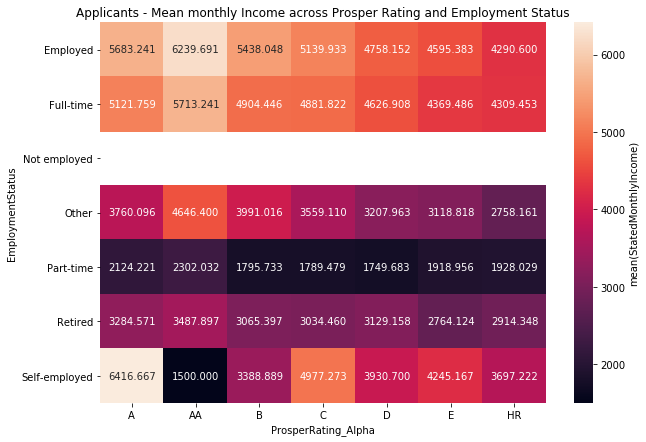

In [225]:
plt.figure(figsize = [10, 7])
loan_df_sub = loan_df_sub[loan_df_sub['EmploymentStatus'] != 'Not employed']

cat_means = loan_df_sub.groupby(['ProsperRating_Alpha', 'EmploymentStatus']).mean()['StatedMonthlyIncome']
cat_means = cat_means.reset_index(name = 'StatedMonthlyIncome_avg')
cat_means = cat_means.pivot(index = 'EmploymentStatus', columns = 'ProsperRating_Alpha',
                            values = 'StatedMonthlyIncome_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(StatedMonthlyIncome)'});
plt.title('Applicants - Mean monthly Income across Prosper Rating and Employment Status');


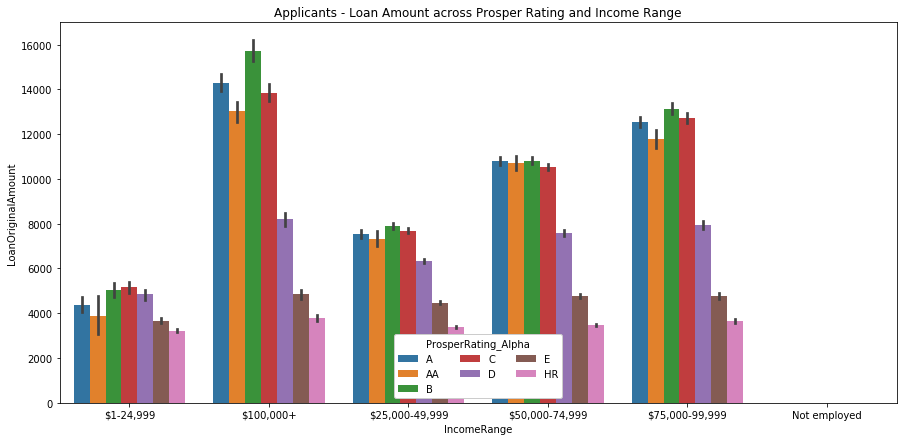

In [226]:
plt.figure(figsize = [15, 7])

ax = sb.barplot(data = loan_df_sub, x = 'IncomeRange', y = 'LoanOriginalAmount', hue = 'ProsperRating_Alpha')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'ProsperRating_Alpha')
plt.title('Applicants - Loan Amount across Prosper Rating and Income Range');

#### Does rating depend on the monhtly income and Employment status?

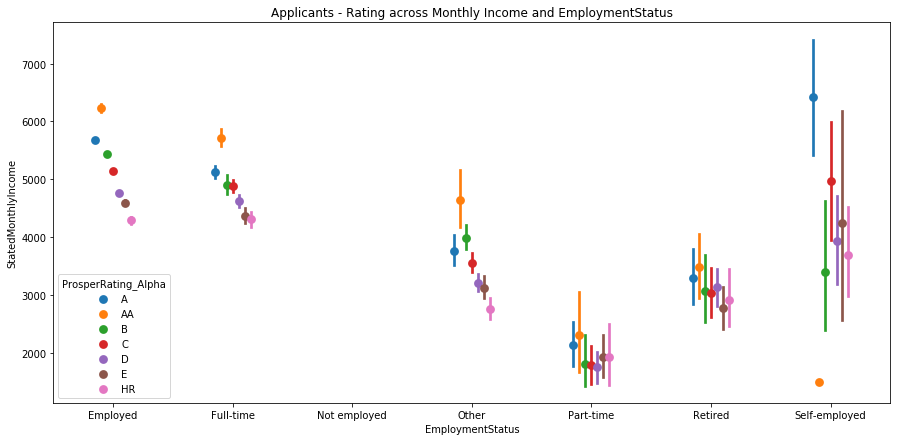

In [227]:
plt.figure(figsize = [15, 7])
ax = sb.pointplot(data = loan_df_sub, x = 'EmploymentStatus', y = 'StatedMonthlyIncome', hue = 'ProsperRating_Alpha',
                  dodge = 0.3, linestyles = "")
plt.title('Applicants - Rating across Monthly Income and EmploymentStatus');

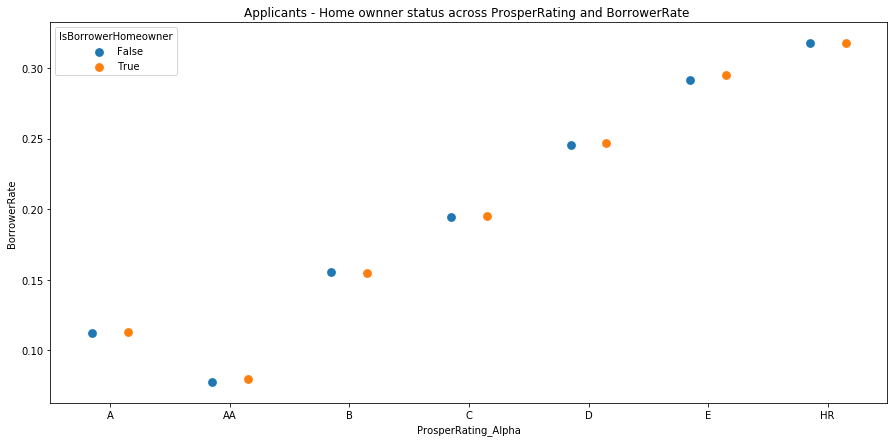

In [228]:
plt.figure(figsize = [15, 7])
ax = sb.pointplot(data = loan_df_sub, x = 'ProsperRating_Alpha', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner',
                  dodge = 0.3, linestyles = "");
plt.title('Applicants - Home ownner status across ProsperRating and BorrowerRate ');

#### Insights from the multivariate exploration data
- For Applicants with prosper ratings from AA to D have the higher loan amount with increased salary

- Employed and full time employees have their mean salaries in higher range where as the Part-time employees has low mean salaraie range 

- Majority of the borrowers are falling under prosper rating of B , irrespective of the income range

- The monthly income of borrowers are having higher values for employed, other and full time employment status with the prosper rating of AA, A and B

- We observe that without homeowner tend to have a higher interest rate, and thus lower rating.However homeowner tends to have lower interest rate and higher rating. So we can safely say that homeowner is safest bet when gving a loan. We can also clearly observe that HR prosper rating applicants have higher interest rates


#### To conclude this analysis , I say that the loan approval status is heavily dependent on the applicant's information on IncomeRange, Homeownerstatus and employment status.